## 1. Define Objective
Objective - Infer IQ , Years of experience and Age affects income using linear model

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import DataFrame as DF

D:\Users\snandan.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 2. Collect Data

In [2]:
# create dataset
np.random.seed(555)
X1 = np.random.normal(100,15, 200).astype(int)
X2 = np.random.normal(10,4.5, 200).astype(int)
X3 = np.random.normal(32,4, 200).astype(int)
dob = np.datetime64('2017-10-31') - 365*X3
b = 5
er = np.random.normal(0,1.5,200)

Y = np.array([0.3*x1 + 1.5*x2 + 0.83*x3 + b + e for x1,x2,x3,e in zip(X1,X2,X3,er)])

## 3. Data Cleaning

In [3]:
cols = ['iq','years_experience','dob']
df = DF(list(zip(X1,X2,dob)), columns=cols)
df['income'] = Y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
iq                  200 non-null int64
years_experience    200 non-null int64
dob                 200 non-null datetime64[ns]
income              200 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.3 KB


In [4]:
df.describe()

,iq,years_experience,income
count,200.000000,200.000000,200.000000
mean,98.895000,9.220000,74.445354
std,14.991253,4.575618,8.758692
min,62.000000,-5.000000,50.177009
25%,88.500000,6.000000,68.355058
50%,99.000000,10.000000,74.264406
75%,108.250000,12.000000,79.821947
max,134.000000,21.000000,98.020876


In [5]:
df = df[df.years_experience >= 0]
df.describe()

,iq,years_experience,income
count,196.000000,196.000000,196.000000
mean,98.959184,9.454082,74.839390
std,14.769628,4.307767,8.365558
min,62.000000,0.000000,54.240093
25%,88.500000,6.000000,68.732449
50%,99.000000,10.000000,74.589067
75%,108.250000,12.250000,80.052339
max,134.000000,21.000000,98.020876


## 4. EDA

In [6]:
df.describe(include=['datetime64'])

,dob
count,196
unique,22
top,1986-11-08 00:00:00
freq,20
first,1975-11-11 00:00:00
last,1996-11-05 00:00:00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295A9F72898>,
      dtype=object)

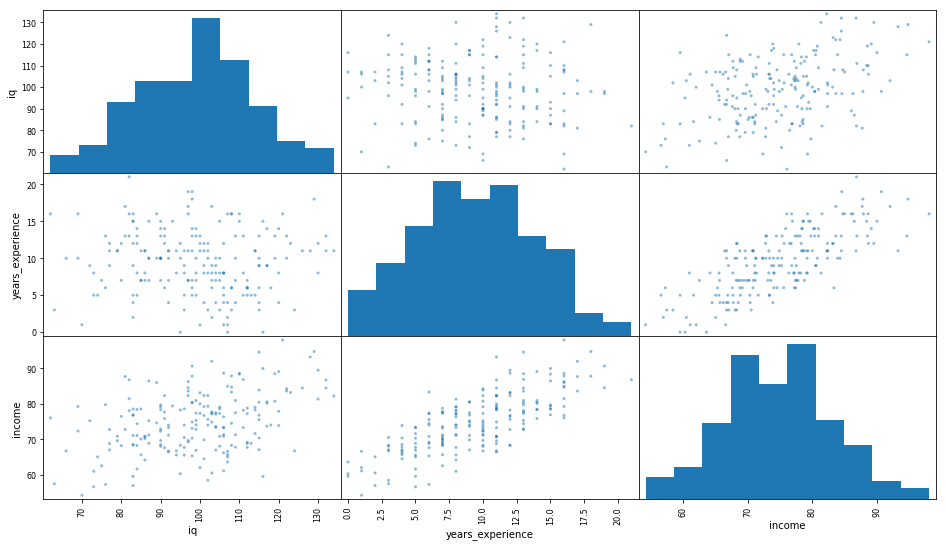

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df,figsize=(16,9))

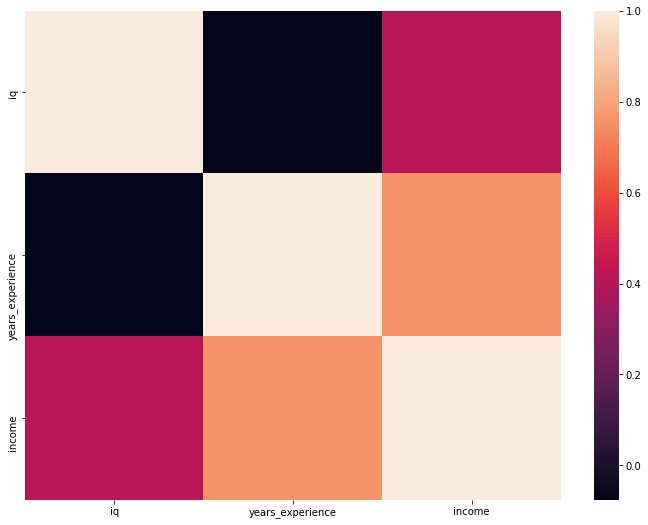

In [8]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

## Data Processing

In [9]:
from datetime import datetime as dt

df['age'] = df.dob.apply(lambda x: (dt.strptime('2017-10-31','%Y-%m-%d') -x).days/365)
df.drop('dob', axis=1, inplace=True)
df.head()

,iq,years_experience,income,age
0,102,3,58.463855,23.0
1,105,15,78.621766,25.0
2,83,2,56.977682,29.0
3,103,9,74.873786,33.0
4,97,11,82.345164,36.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295A634A1D0>,
      dtype=object)

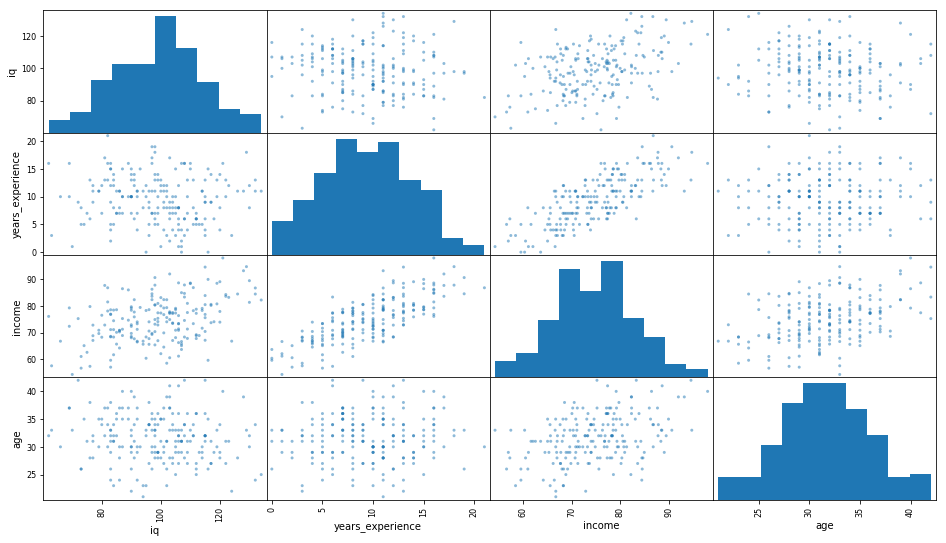

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df,figsize=(16,9))

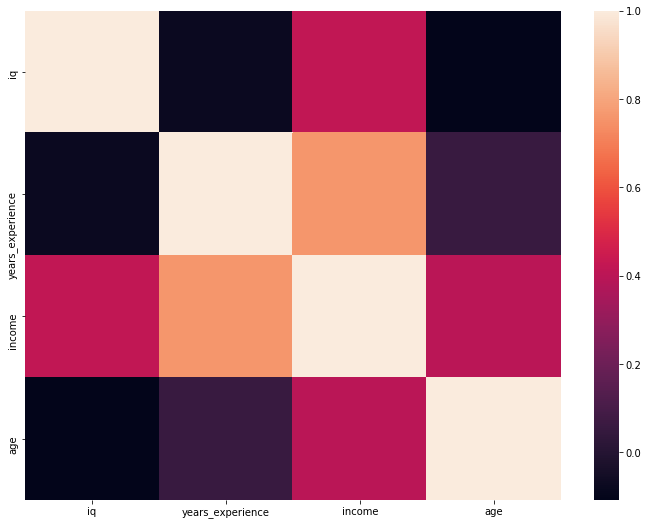

In [11]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

## 6. Train and Evaluate

In [12]:
#train and test split

X = df.iloc[:,[0,1,3]]
Y = df.income

tr_idx = X.sample(frac=0.67).index
Xtr = X[X.index.isin(tr_idx)].values
Xts = X[~X.index.isin(tr_idx)].values

Ytr = Y[Y.index.isin(tr_idx)].values
Yts = Y[~Y.index.isin(tr_idx)].values


In [15]:
Xtr.dump('Xtr.npy')
Ytr.dump('ytr.npy')

Xts.dump('Xts.npy')
Yts.dump('yts.npy')

In [17]:
# reading the data
Xtr = np.load('Xtr.npy')
ytr = np.load('ytr.npy')

training = tf.data.Dataset.from_tensor_slices((Xtr,Ytr))
training2 = tf.data.Dataset.from_tensor_slices({'x_tr':Xtr,'y_tr':ytr})

print(training2.output_types)
print(training2.output_shapes)

{'x_tr': tf.float64, 'y_tr': tf.float64}
{'x_tr': TensorShape([Dimension(3)]), 'y_tr': TensorShape([])}


### Iteror

In [18]:
len(Xtr)

131

In [21]:
sess = tf.Session()

In [23]:
iterator = training2.make_one_shot_iterator()
next_element = iterator.get_next()

for i in range(131):
    value = sess.run(next_element)
    print(value['y_tr'])

58.46385501134321
78.62176644725577
74.87378602999186
82.3451639232842
71.36394232198656
68.86607199096053
84.46497547360381
68.07863144488398
81.34280301359145
72.82972856214282
74.10359578913412
71.63211227078334
84.47719447634135
70.8625728000356
72.78103167247302
83.12354807850141
82.21480578182427
63.6304229670532
78.56469187979704
83.6177156191309
69.26999662560108
70.33713871534796
66.92866650802343
78.59269088257484
83.2076776500986
75.33958234375136
78.5513893853179
66.61433109291313
65.59378462617198
62.55643507608056
80.93948481374724
70.83010764671275
77.91321736962354
79.4223530055709
72.80731035701088
68.55178741653346
88.659757010847
78.37595001643201
79.67907915925967
89.96633035638258
67.64214152278129
61.6449691272091
68.51609895198001
80.35964527715005
82.32738955049696
88.60251739778863
66.74084087252673
92.0045042806686
88.39360327554763
65.71252770054033
68.86853147196973
59.571324065961605
75.63072188441781
77.21131293833085
65.05847331770318
77.51282357257574
86

In [24]:
iterator = training2.make_one_shot_iterator()
next_element = iterator.get_next()

for i in range(132):
    try:
        value = sess.run(next_element)
        print(value['y_tr'])
    except tf.errors.OutOfRangeError as e:
        print('No more data!')

58.46385501134321
78.62176644725577
74.87378602999186
82.3451639232842
71.36394232198656
68.86607199096053
84.46497547360381
68.07863144488398
81.34280301359145
72.82972856214282
74.10359578913412
71.63211227078334
84.47719447634135
70.8625728000356
72.78103167247302
83.12354807850141
82.21480578182427
63.6304229670532
78.56469187979704
83.6177156191309
69.26999662560108
70.33713871534796
66.92866650802343
78.59269088257484
83.2076776500986
75.33958234375136
78.5513893853179
66.61433109291313
65.59378462617198
62.55643507608056
80.93948481374724
70.83010764671275
77.91321736962354
79.4223530055709
72.80731035701088
68.55178741653346
88.659757010847
78.37595001643201
79.67907915925967
89.96633035638258
67.64214152278129
61.6449691272091
68.51609895198001
80.35964527715005
82.32738955049696
88.60251739778863
66.74084087252673
92.0045042806686
88.39360327554763
65.71252770054033
68.86853147196973
59.571324065961605
75.63072188441781
77.21131293833085
65.05847331770318
77.51282357257574
86

### Preprocessing

#### Steps:
- Define your transformations
- Use Data.map(f) where f is the transformation

In [25]:
df.to_csv('data.csv', index=False)

### Tensorflow ops

In [29]:
# define the tansformation
# we will add noise to X

def input_fun(csv_file,feature_names=['x1','x2','x3'],noise=True):
    def decode_csv_add_noise(line, noise=noise):
        parsed_line = tf.decode_csv(line,[[0.],[0.],[0.],[0.]])
        label = parsed_line[-1]
        del parsed_line[-1]
        features = parsed_line
        
        if noise:
            features = tf.add(features,tf.random_normal(shape=[len(features)],mean=0,stddev=0.1))
            
        return features, label
    
    dataset = (tf.data.TextLineDataset(csv_file).skip(1).map(decode_csv_add_noise))
    
    iterator = dataset.make_one_shot_iterator()
    features, label = iterator.get_next()
    return features, label

In [32]:
next_ = input_fun('data.csv',noise=False)

with tf.Session() as s:
    X, y = s.run(next_)
    print(X, y)
    
next_ = input_fun('data.csv',noise=True)

with tf.Session() as s:
    X, y = s.run(next_)
    print(X, y)

[102.         3.        58.463856] 23.0
[101.94784     2.9505563  58.391872 ] 23.0


### Batching Data

In [33]:
# define the tansformation
# we will add noise to X

def input_fun(csv_file,feature_names=['x1','x2','x3'], batch_size=16, noise=True):
    def decode_csv_add_noise(line, noise=noise):
        parsed_line = tf.decode_csv(line,[[0.],[0.],[0.],[0.]])
        label = parsed_line[-1]
        del parsed_line[-1]
        features = parsed_line
        
        if noise:
            features = tf.add(features,tf.random_normal(shape=[len(features)],mean=0,stddev=0.1))
            
        return features, label
    
    dataset = (tf.data.TextLineDataset(csv_file).skip(1).map(decode_csv_add_noise))
    
    dataset = dataset.batch(batch_size)
    iterator = dataset.make_one_shot_iterator()
    batch_features, batch_labels = iterator.get_next()
    return batch_features, batch_labels

In [34]:
next_ = input_fun('data.csv',noise=False, batch_size = 10)

with tf.Session() as s:
    batch = s.run(next_)
    print(batch[0])
    print()
    print(batch[1])

[[102.         3.        58.463856]
 [105.        15.        78.621765]
 [ 83.         2.        56.97768 ]
 [103.         9.        74.87379 ]
 [ 97.        11.        82.34516 ]
 [106.         8.        71.363945]
 [ 87.         7.        68.86607 ]
 [132.        13.        84.46497 ]
 [105.         3.        68.07863 ]
 [ 94.        11.        66.75542 ]]

[23. 25. 29. 33. 36. 31. 35. 24. 31. 21.]
